In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../ai_medreview/data/data.csv')
data.head()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id
0,2023-07-13 15:28:00,Extremely likely,Very friendly caring staff treated me with res...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.892932,neutral,0.000000,13.0,3,5.0,Staff Empathy and Compassion,NaN,NaN,NaN
1,2023-07-13 15:29:00,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,4.0,0,5.0,NaN,NaN,NaN,NaN
2,2023-07-13 15:29:00,Extremely likely,The doctor was very understanding and very kno...,NaN,Earls-Court-Surgery,Brompton-Health-PCN,positive,0.969176,neutral,0.000000,8.0,5,5.0,Patient Respect,NaN,NaN,NaN
3,2023-07-13 15:30:00,Extremely likely,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.000000,5.0,5,5.0,NaN,NaN,NaN,NaN
4,2023-07-13 15:31:00,Extremely likely,I was spoken to politely on the phone and a te...,No I was happy with everything,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.756987,positive,0.837488,44.0,6,5.0,Follow-up and Continuity of Care,Patient Respect,NaN,NaN


In [3]:
data = data[(data['sentiment_free_text'] == 'negative')]

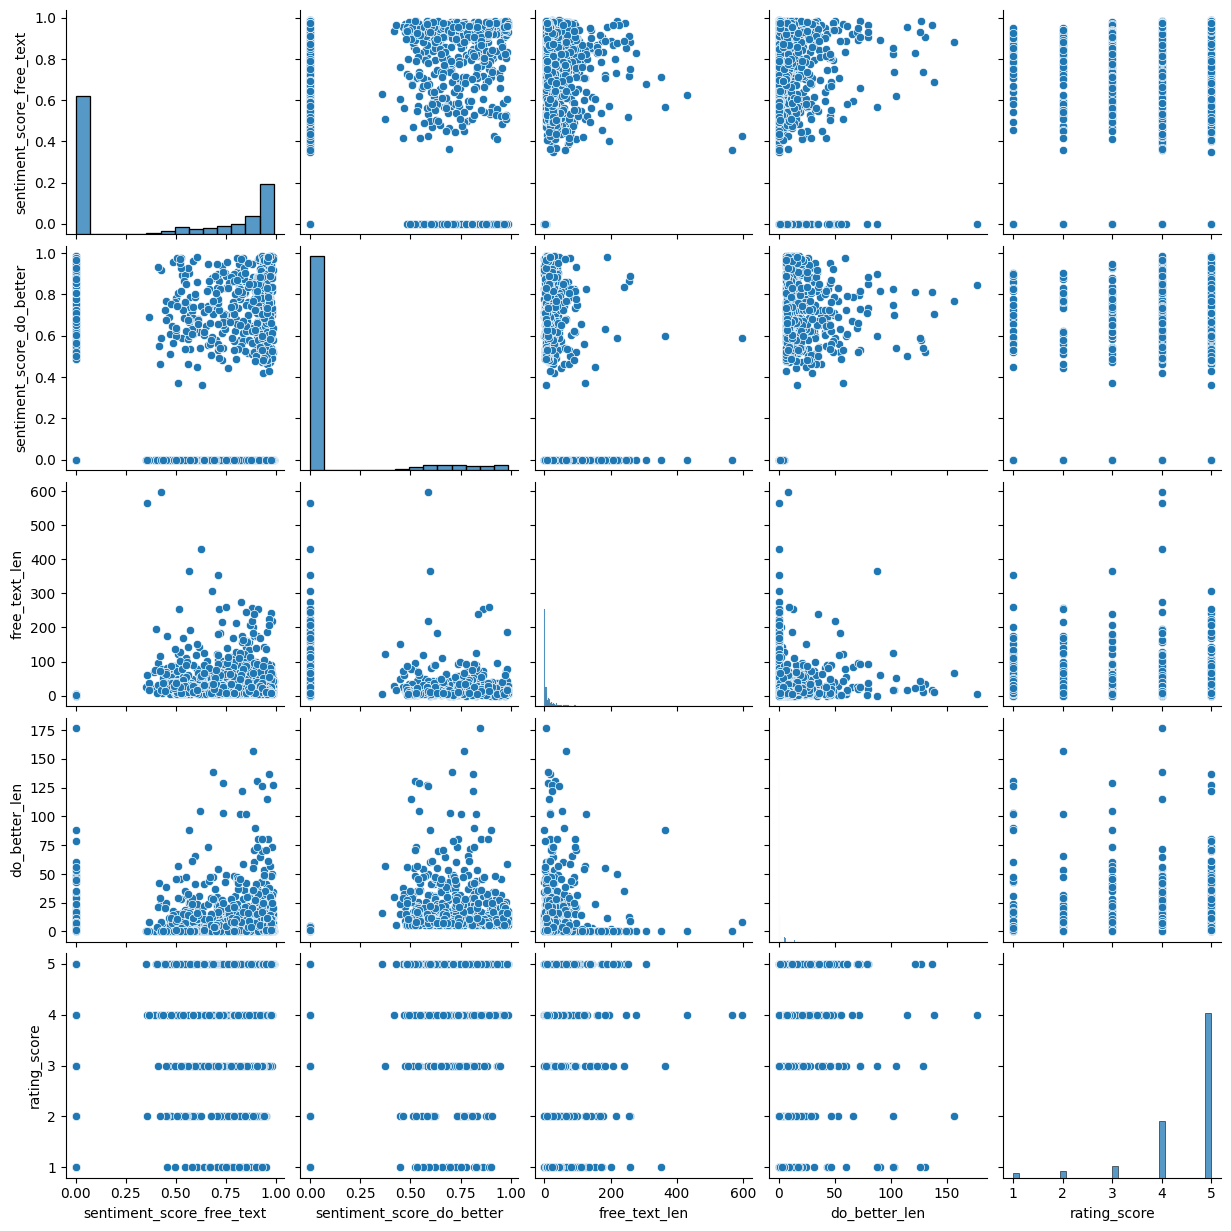

In [3]:
sns.pairplot(data)

In [ ]:
data["time"] = pd.to_datetime(data["time"])

In [4]:
data.shape

(372, 17)

In [5]:
data.dropna(subset='free_text', inplace=True)

In [6]:
# Filter the data to include only those from 'Brompton-Health-PCN'
brompton_data = data[data['pcn'] == 'Brompton-Health-PCN']

# Since we're creating a heatmap, we need to pivot the data to get counts of feedback_labels per surgery
heatmap_data = pd.crosstab(brompton_data['surgery'], brompton_data['feedback_labels'])

# Showing the structure of the heatmap data
heatmap_data.head(), heatmap_data.shape

(feedback_labels                     Accessibility and Convenience  \
 surgery                                                             
 Earls-Court-Medical-Centre                                      0   
 Earls-Court-Surgery                                             1   
 Emperors-Gate-Health-Centre                                     0   
 Health-Partners-at-Violet-Melchett                              9   
 Knightsbridge-Medical-Centre                                    0   
 
 feedback_labels                     Appointment Availability  \
 surgery                                                        
 Earls-Court-Medical-Centre                                 4   
 Earls-Court-Surgery                                        9   
 Emperors-Gate-Health-Centre                                5   
 Health-Partners-at-Violet-Melchett                        33   
 Knightsbridge-Medical-Centre                               1   
 
 feedback_labels                     Communication 

In [7]:
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

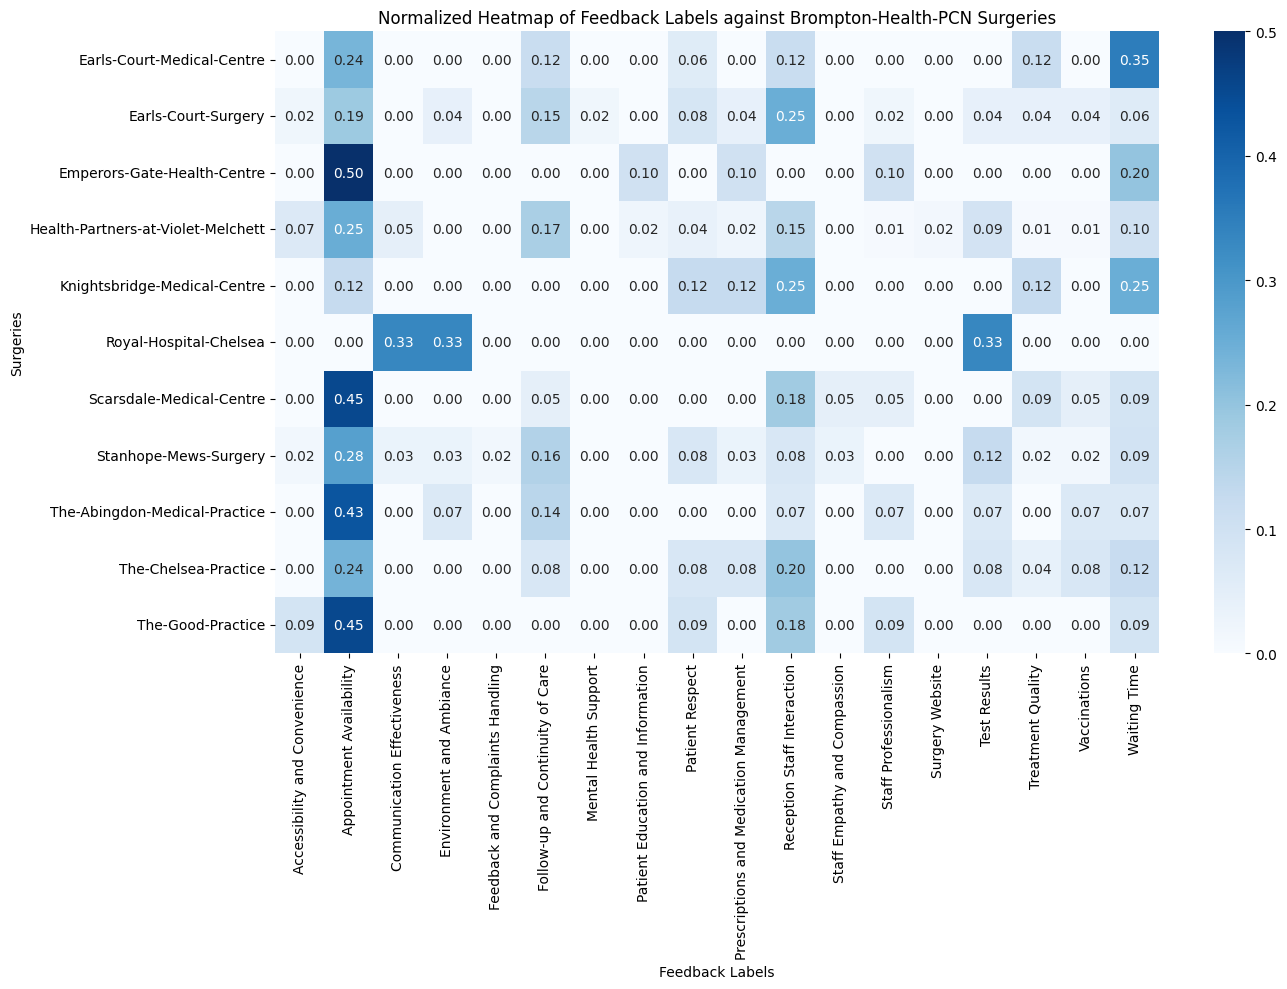

In [8]:
# Create a new heatmap using the normalized data
plt.figure(figsize=(14, 10))
ax = sns.heatmap(normalized_heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title('Normalized Heatmap of Feedback Labels against Brompton-Health-PCN Surgeries')
plt.xlabel('Feedback Labels')
plt.ylabel('Surgeries')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the normalized heatmap
plt.show()

In [9]:
data = pd.read_csv('../ai_medreview/data/data.csv')

In [10]:
data = data[((data['sentiment_free_text'] == 'positive')|(data['sentiment_free_text'] == 'neutral'))]
data.dropna(subset='free_text', inplace=True)
brompton_data = data[data['pcn'] == 'Brompton-Health-PCN']
heatmap_data = pd.crosstab(brompton_data['surgery'], brompton_data['feedback_labels'])
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

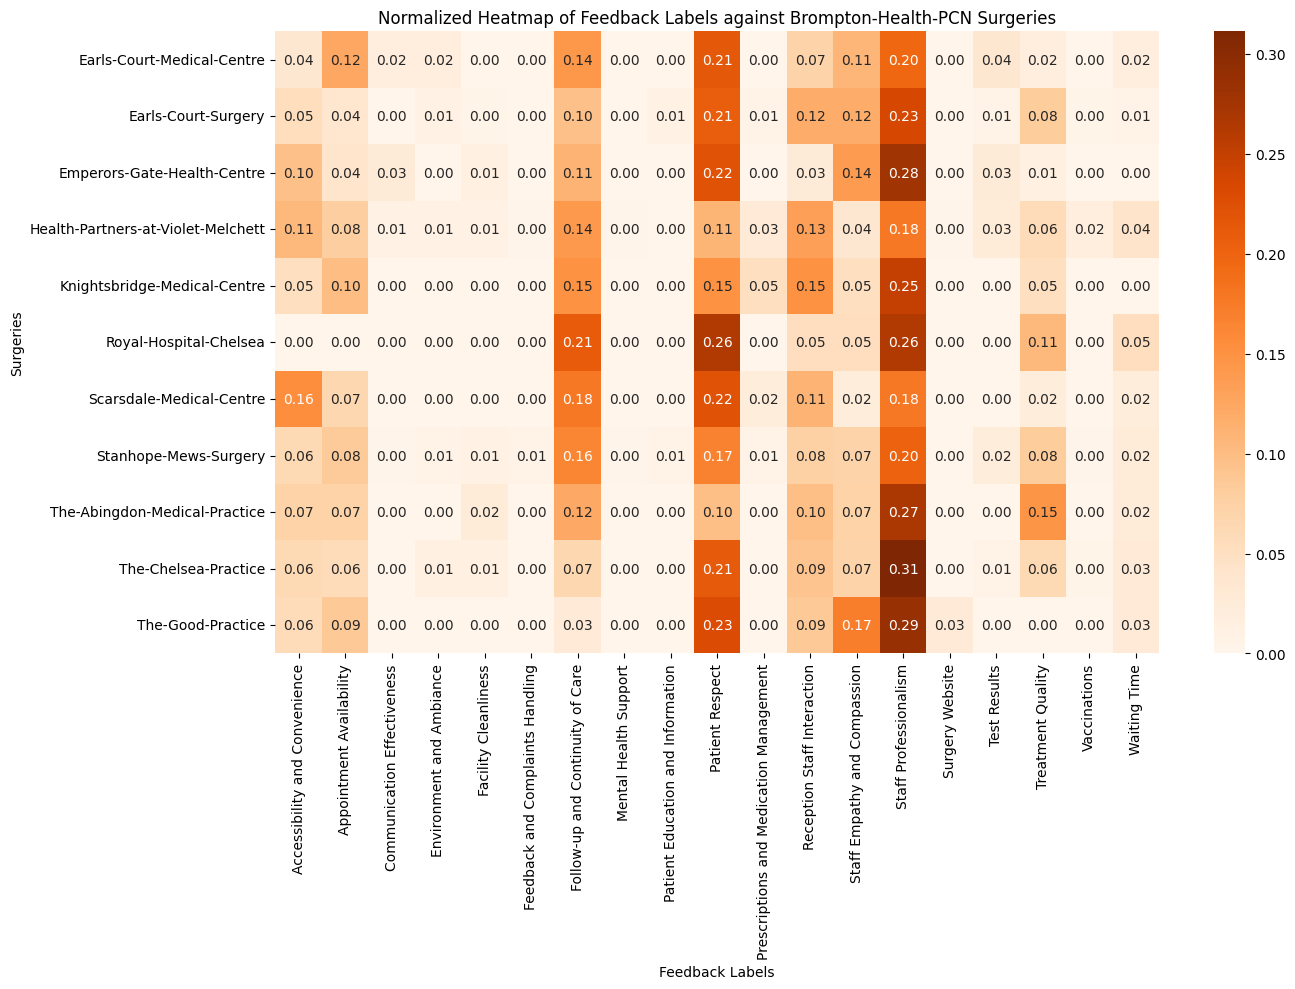

In [12]:
# Create a new heatmap using the normalized data
plt.figure(figsize=(14, 10))
ax = sns.heatmap(normalized_heatmap_data, annot=True, cmap="Oranges", fmt=".2f")
plt.title('Normalized Heatmap of Feedback Labels against Brompton-Health-PCN Surgeries')
plt.xlabel('Feedback Labels')
plt.ylabel('Surgeries')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the normalized heatmap
plt.show()